## Data-Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('data/train.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.head() #previewing Data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### Categorical Columns:
Survived,Pclass,Sex,SibSp,Parch,Embarked
### Numerical Columns:
Age,Fare,PassengerID
### Mixed Columns:
Name,Ticket,Cabin

In [6]:
df.info() #gives high-level overview of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum() #we found missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we observe
1. Missing values in Age, Cabin and Embarked columns.
2. More than 70% values missing in cabin so we'll drop that column.
3. Few columns have inappropriate data types.

In [8]:
df.drop(columns=['Cabin'],inplace=True)

In [9]:
#Handling missing values in age by inputing mean.
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [10]:
#Handling missing values in Embarked by putting most repeated Embark
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
df['Embarked'].fillna('S',inplace=True)

### Changing data type for the following columns
- Survived(category)
- Pclass(category)
- Sex(category)
- Age(int)
- Embarked(category)

In [12]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [14]:
#Five Point Summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


## EDA
### 1. Analysis 
1. Univariate Analysis
2. Multivariate Analysis
### 2. Feature Engineering
1. Creating new columns
2. Modifying existing ones
### 3. Handing Outliers
1. Detect Outliers
2. Remove outliers

In [15]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')

Out of 891 people, 62% died in the accident.


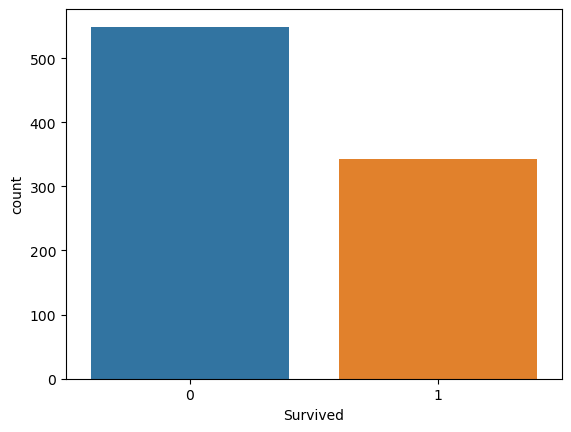

In [16]:
#1.1
sns.countplot(x='Survived', data=df)
dead_people = df['Survived'].value_counts().values[0]
death_percentage = round((dead_people / 891) * 100)
print("Out of 891 people, {}% died in the accident.".format(death_percentage))


Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

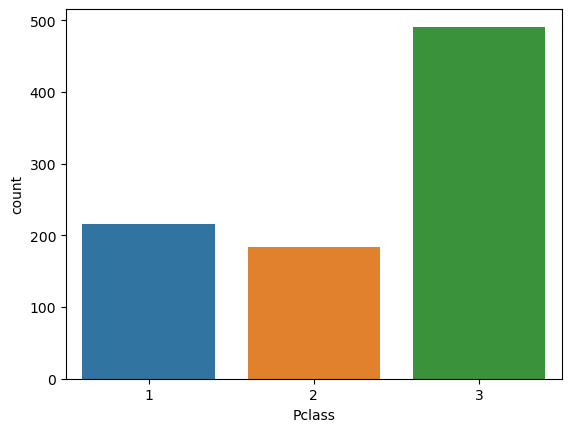

In [17]:
# Pclass col
print((df['Pclass'].value_counts()/891)*100)
sns.countplot(x='Pclass',data=df)

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

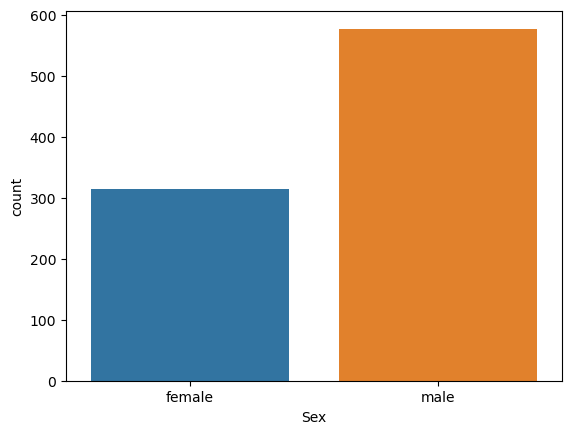

In [18]:
print((df['Sex'].value_counts()/891)*100)
sns.countplot(x='Sex',data=df)

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: xlabel='SibSp', ylabel='count'>

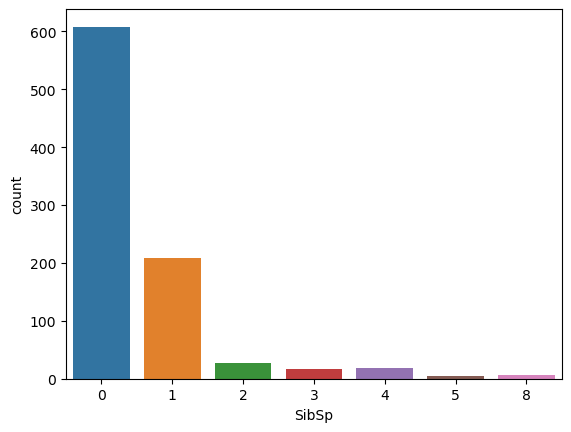

In [19]:
print(df['SibSp'].value_counts())
sns.countplot(x='SibSp',data=df)

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


<Axes: xlabel='Parch', ylabel='count'>

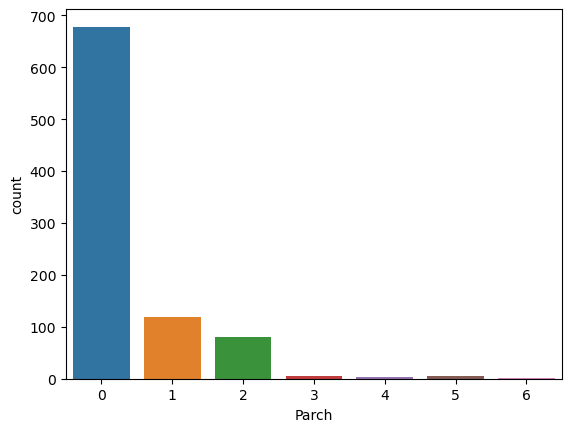

In [20]:
print(df['Parch'].value_counts())
sns.countplot(x='Parch',data=df)

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


<Axes: xlabel='Embarked', ylabel='count'>

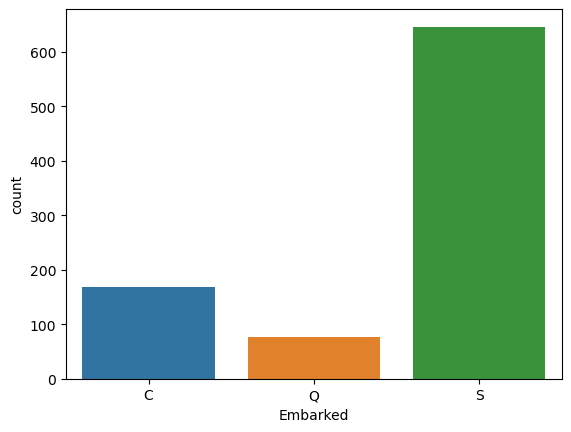

In [21]:
print(df['Embarked'].value_counts())
sns.countplot(x='Embarked',data=df)

In [22]:
#Guideline(Skewness):
#0 to ±0.5: Approximately symmetric
#±0.5 to ±1.0: Moderately skewed
#Beyond ±1.0: Highly skewed

#Guideline(Kurtois)
#0: Normal distribution.
#0 to 1: Slightly Leptokurtic.
#1 to 2: Moderately Leptokurtic.
#> 2: Highly Leptokurtic.
#-1 to 0: Slightly Platykurtic.
#< -1: Moderately to Highly Platykurtic

0.45956263424701577
0.9865867453652877


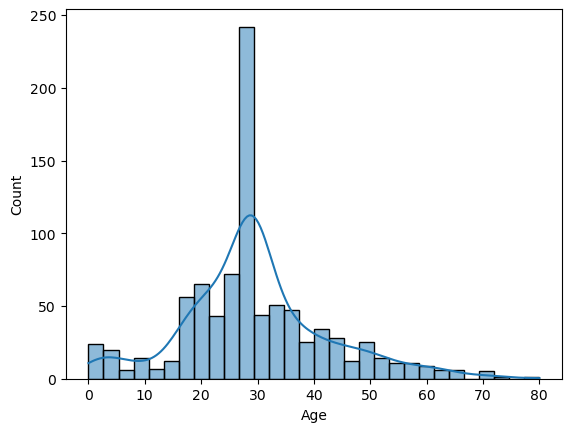

In [23]:
#Age col
sns.histplot(df['Age'],kde=True)
print(df['Age'].skew())
print(df['Age'].kurt())

<Axes: >

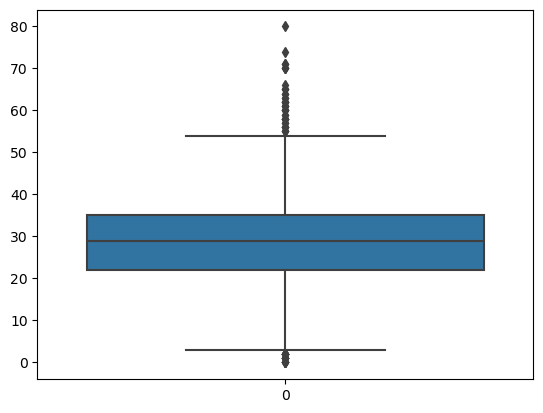

In [24]:
sns.boxplot(df['Age'])

Observation
- age can be considered as normal distribution
- deeper analysis is required for outlier detection

4.787316519674893
33.39814088089868


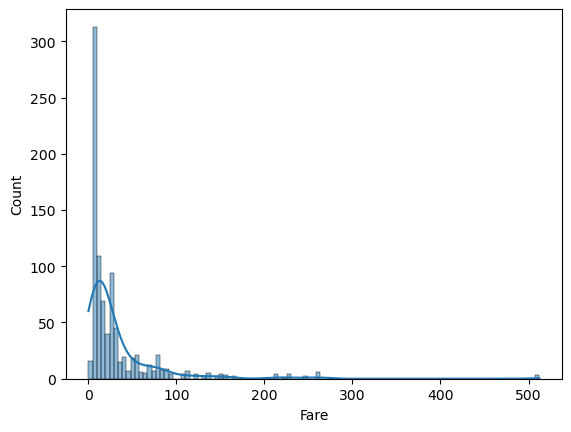

In [25]:
sns.histplot(df['Fare'],kde=True)
print(df['Fare'].skew())
print(df['Fare'].kurt())

<Axes: >

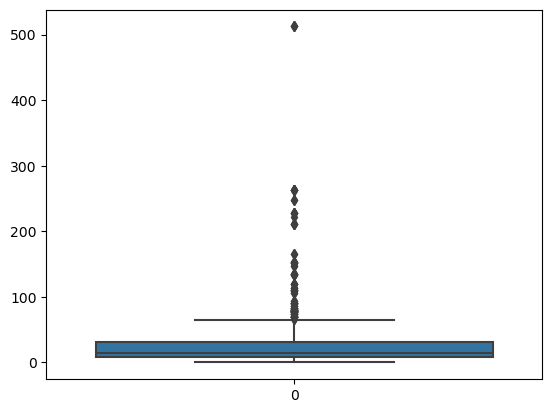

In [26]:
sns.boxplot(df['Fare'])

Observation:
- Highly skewed data, a lot of people had cheaper tickets
- Outliers are there

In [29]:
df.drop(columns=['Name'],inplace=True)

In [30]:
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()

ValueError: could not convert string to float: 'male'